In [1]:
import matplotlib.pyplot as plt
from math import comb
import numpy as np

In [2]:
def microcanonical_probability(E1, M, E):
    return comb(E - E1 + M - 2, M - 2)/comb(E + M - 1, M - 1)

Text(0.5, 1.0, '$\\mathrm{E = 100}$ $\\mathrm{M = 20}$')

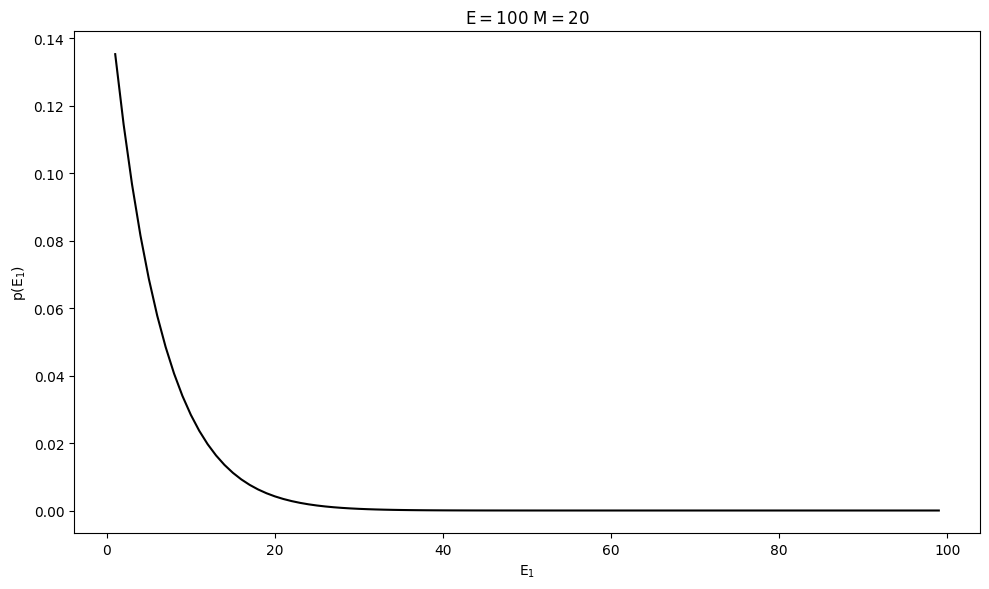

In [3]:
M = 20 #number of boxes
E = 100 #number of quants

fig, ax = plt.subplots(figsize=(10, 6), tight_layout = True)

E1s = np.arange(1, E, 1)
ax.plot(E1s, np.array([microcanonical_probability(E1, M, E) for E1 in E1s]), color="black", linestyle='solid')
ax.set_xlabel(r"$\mathrm{E_1}$")
ax.set_ylabel(r"$\mathrm{p(E_1)}$")
ax.set_title(r"$\mathrm{E = 100}$ $\mathrm{M = 20}$")

Text(0.5, 1.0, '$\\mathrm{E = 10}$ $\\mathrm{M = 20}$')

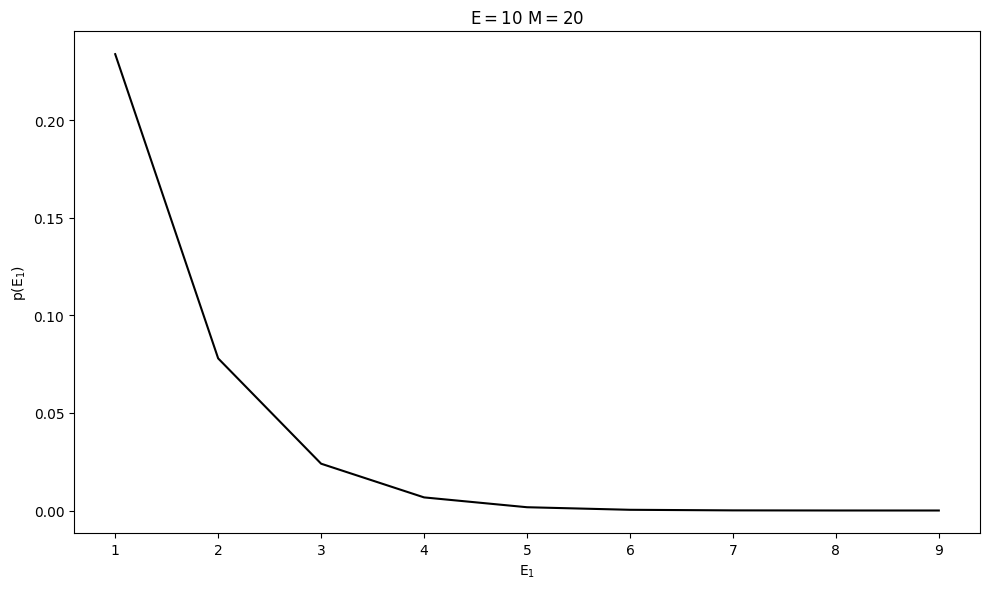

In [4]:
M = 20 #number of boxes
E = 10 #number of quants

fig, ax = plt.subplots(figsize=(10, 6), tight_layout = True)

E1s = np.arange(1, E, 1)
ax.plot(E1s, np.array([microcanonical_probability(E1, M, E) for E1 in E1s]), color="black", linestyle='solid')
ax.set_xlabel(r"$\mathrm{E_1}$")
ax.set_ylabel(r"$\mathrm{p(E_1)}$")
ax.set_title(r"$\mathrm{E = 10}$ $\mathrm{M = 20}$")

Text(0.5, 1.0, '$\\mathrm{E = 100}$ $\\mathrm{M = 20}$')

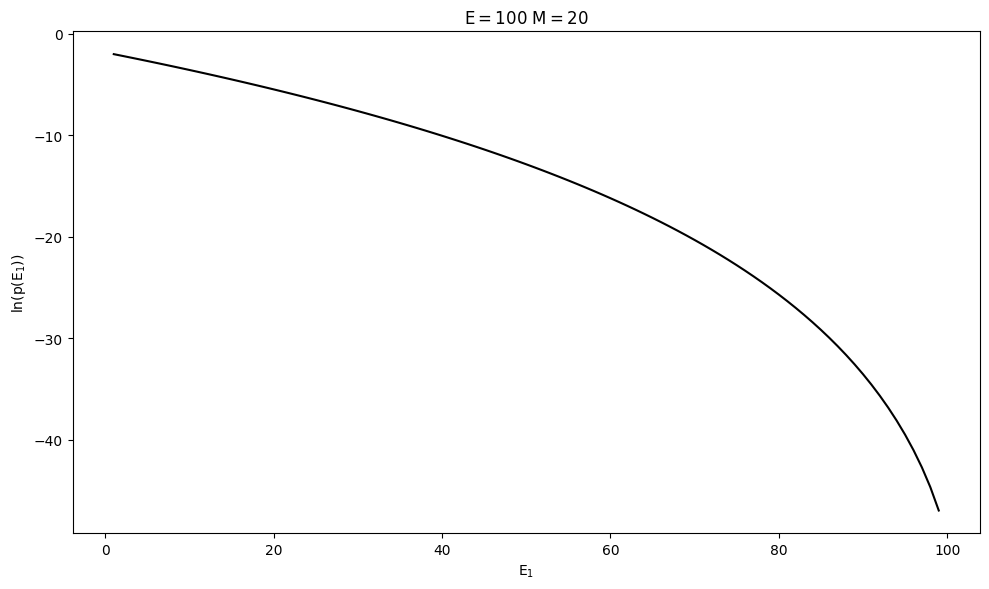

In [5]:
M = 20 #number of boxes
E = 100 #number of quants

fig, ax = plt.subplots(figsize=(10, 6), tight_layout = True)

E1s = np.arange(1, E, 1)
ax.plot(E1s, np.log(np.array([microcanonical_probability(E1, M, E) for E1 in E1s])), color="black", linestyle='solid')
ax.set_xlabel(r"$\mathrm{E_1}$")
ax.set_ylabel(r"$\mathrm{ln(p(E_1))}$")
ax.set_title(r"$\mathrm{E = 100}$ $\mathrm{M = 20}$")

In [6]:
from scipy.optimize import curve_fit

E1s_exp = np.arange(1, 20, 1)
pE1s_exp = np.log(np.array([microcanonical_probability(E1, M, E) for E1 in E1s_exp]))

def linear(x, b, a):
    return b - a*x

popt, popc = curve_fit(linear, E1s_exp, pE1s_exp)

print("ln(N) = {:.2f}".format(popt[0]))
print("ln(1/kBT) = {:.2f}".format(popt[1]))

ln(N) = -1.77
ln(1/kBT) = 0.18


Text(0.5, 1.0, '$\\mathrm{E = 100}$ $\\mathrm{M = 20}$')

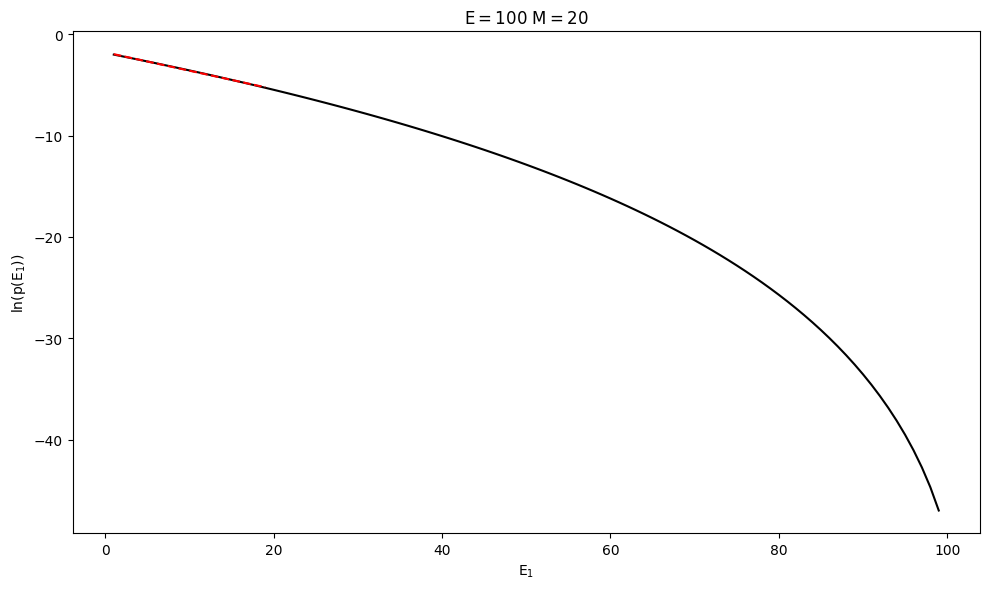

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6), tight_layout = True)

E1s = np.arange(1, E, 1)
ax.plot(E1s, np.log(np.array([microcanonical_probability(E1, M, E) for E1 in E1s])), color="black", linestyle='solid')
ax.plot(E1s_exp, linear(E1s_exp, *popt), color="red", linestyle='dashed')
ax.set_xlabel(r"$\mathrm{E_1}$")
ax.set_ylabel(r"$\mathrm{ln(p(E_1))}$")
ax.set_title(r"$\mathrm{E = 100}$ $\mathrm{M = 20}$")

#curvature in the end due to the non-infinite reservoir, then the probability drops
#combinatorially, not exponentially!